# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash;  30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов


-----

In [52]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm

## Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за лекгкую часть задания 3 и 5 весной 2023.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [53]:
df = pd.read_excel('grades.xlsx',header=[0,1],index_col=[0],sheet_name=1)
task_3, task_5 = df['Задание 3','Сумма Л'], df['Задание 5','Сумма Л']

In [54]:
info = pd.concat([task_3.describe(),task_5.describe()],axis=1)
info

,Задание 3,Задание 5
,Сумма Л,Сумма Л
count,170.000000,170.000000
mean,39.308824,31.997059
std,32.187141,31.882342
min,0.000000,0.000000
25%,0.000000,0.000000
50%,47.000000,28.500000
75%,68.750000,62.750000
max,85.000000,87.000000


In [55]:
info.iloc[1,0] - info.iloc[1,1]

7.311764705882357

Величина сдвига 7.3 балла. Оценим статзначимость результата используя t-test. Ожидаем, что размер выборки достаточен, чтобы среднее были распределены нормально

In [56]:
import scipy.stats as sps
sps.ttest_ind(task_3, task_5,equal_var=False)

Ttest_indResult(statistic=2.104289714785444, pvalue=0.03609138048305918)

Не можем отвергнуть гипотезу о различии средних выборок

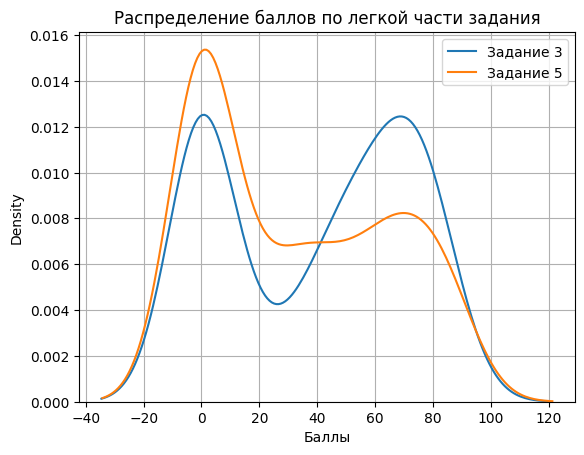

In [57]:
sns.kdeplot(task_3,label='Задание 3'),sns.kdeplot(task_5, label='Задание 5'), plt.legend(), plt.xlabel('Баллы'), plt.title('Распределение баллов по легкой части задания'), plt.grid()
None

Использование kdeplot считаю нецелевым применительно к задаче. Экспертно знаем, что баллы в задаче неотрицательны. Используем гистограммы

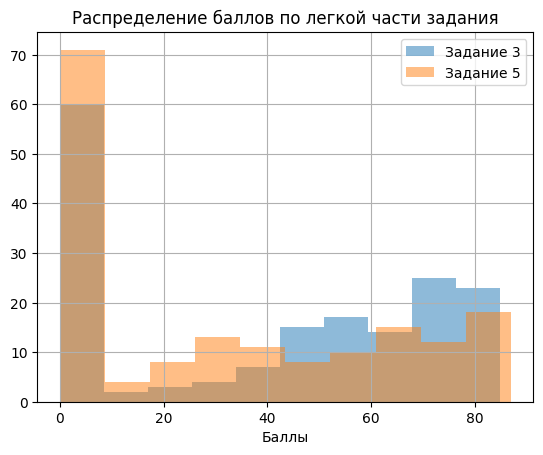

In [58]:
plt.hist(task_3,label='Задание 3',alpha=0.5),plt.hist(task_5, label='Задание 5',alpha=0.5), plt.legend(), plt.xlabel('Баллы'), plt.title('Распределение баллов по легкой части задания'), plt.grid()
None

Сделайте общий вывод по задаче.

**Вывод:** видим стат значимую убыль в среднем балле за задание. Исходя из гистограмм, связываем это с большим число студентом, имеющих нулевой балл.

## Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

In [59]:
import pandas as pd 
df = pd.read_excel('kog_grades.xlsx',header=[0,1],index_col=[0,1],sheet_name=0)

c:\Users\bug\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [60]:
results_df = df['Баллы за лекцию'].fillna(0)
results_df.index.rename(['Student','Group'],inplace=True)


In [61]:
print(results_df.groupby(['Group']).mean())

                        1          2          3          4          5  \
Group                                                                   
08-500ПА         8.000000   5.428571   6.142857   6.285714   6.142857   
M02-209г         0.000000   0.000000   7.000000   0.000000   5.000000   
M05-216          0.000000   0.000000   5.000000   5.000000   8.000000   
M08-200НД        8.000000   8.000000  10.000000   8.000000   8.000000   
Б05-029б        10.000000   9.000000  12.000000   7.000000   5.000000   
Б06-008          0.000000   0.000000   0.000000   0.000000   8.000000   
Б07-001          2.500000   2.500000   5.000000   6.000000   2.500000   
Б07-002          5.000000   5.000000   5.000000   5.000000   5.000000   
М01-204г        20.000000  18.000000  13.000000  12.000000  10.000000   
М01-205         10.000000   5.000000  10.000000  10.000000  10.000000   
М02-201и         5.000000   7.000000   7.000000   7.000000   0.000000   
М02-202г         0.000000   0.000000   0.000000   0

In [62]:
print(results_df.groupby(['Group']).size().sort_values(ascending=False).head())

Group
М08-200УЦ    10
М08-200НД     9
08-500ПА      7
М08-200ПА     6
М05-211а      4
dtype: int64


Сравним группы М08-200УЦ и М08-200НД 

In [63]:
_tmp_df= results_df.reset_index()

first_group,second_group = _tmp_df.loc[_tmp_df.Group == 'М08-200УЦ',5], _tmp_df.loc[_tmp_df.Group == 'М08-200НД',5]

In [64]:
import scipy.stats as sps

sps.ttest_ind(first_group,second_group,equal_var=False)

Ttest_indResult(statistic=0.17602196891266608, pvalue=0.8626726877233282)

**Вывод:** Опровергаем гипотезу о разнице средних баллов за 5-ое задание между группами М08-200УЦ и М08-200НД

## Задача 3

#### Профиль биология


Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [65]:
path = 'Data_Cortex_Nuclear.csv'
data = pd.read_csv(path,index_col=0)
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Выведем описательные статистики по вещественным параметрам.

In [66]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Количество записей по генотипам:

In [67]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [68]:
data.iloc[:,:10]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N
MouseID,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230
...,...,...,...,...,...,...,...,...,...,...
J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971
J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150
J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342


В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

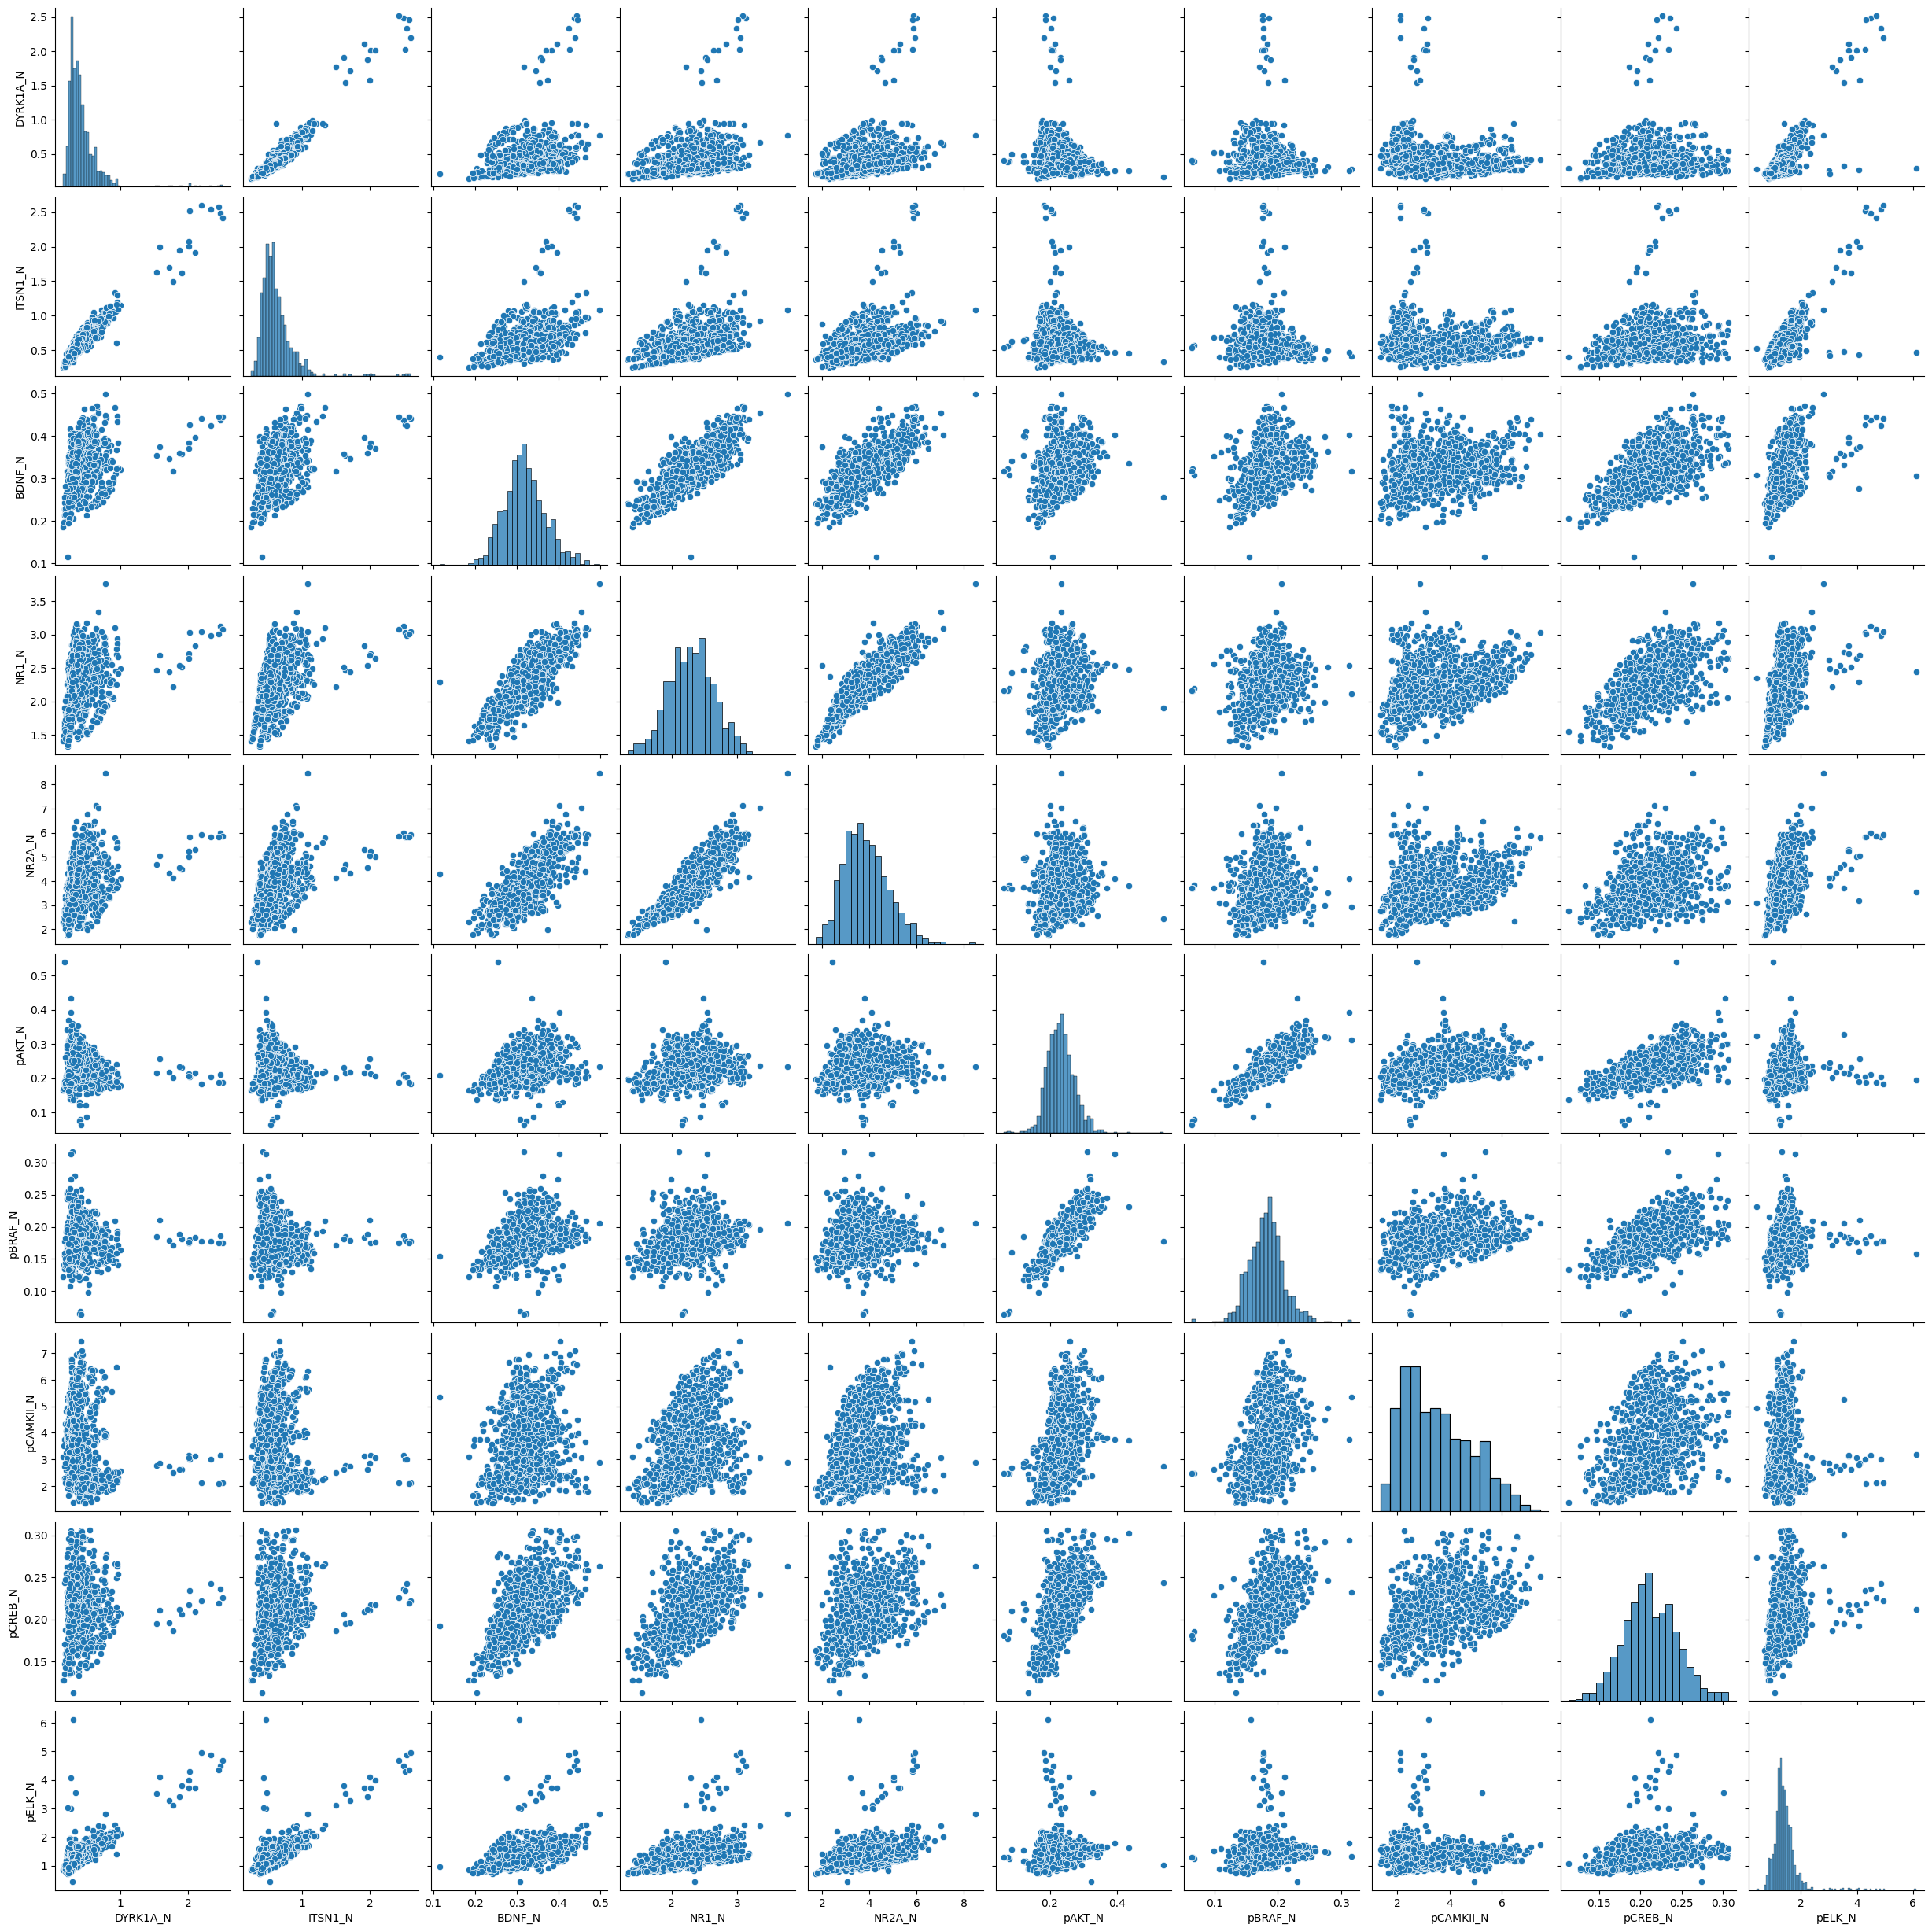

In [69]:
sns.pairplot(data.iloc[:,:10])

Визуализируйте двумерные проекции данных и гистограммы с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета, подробнее можно почитать в [документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). 

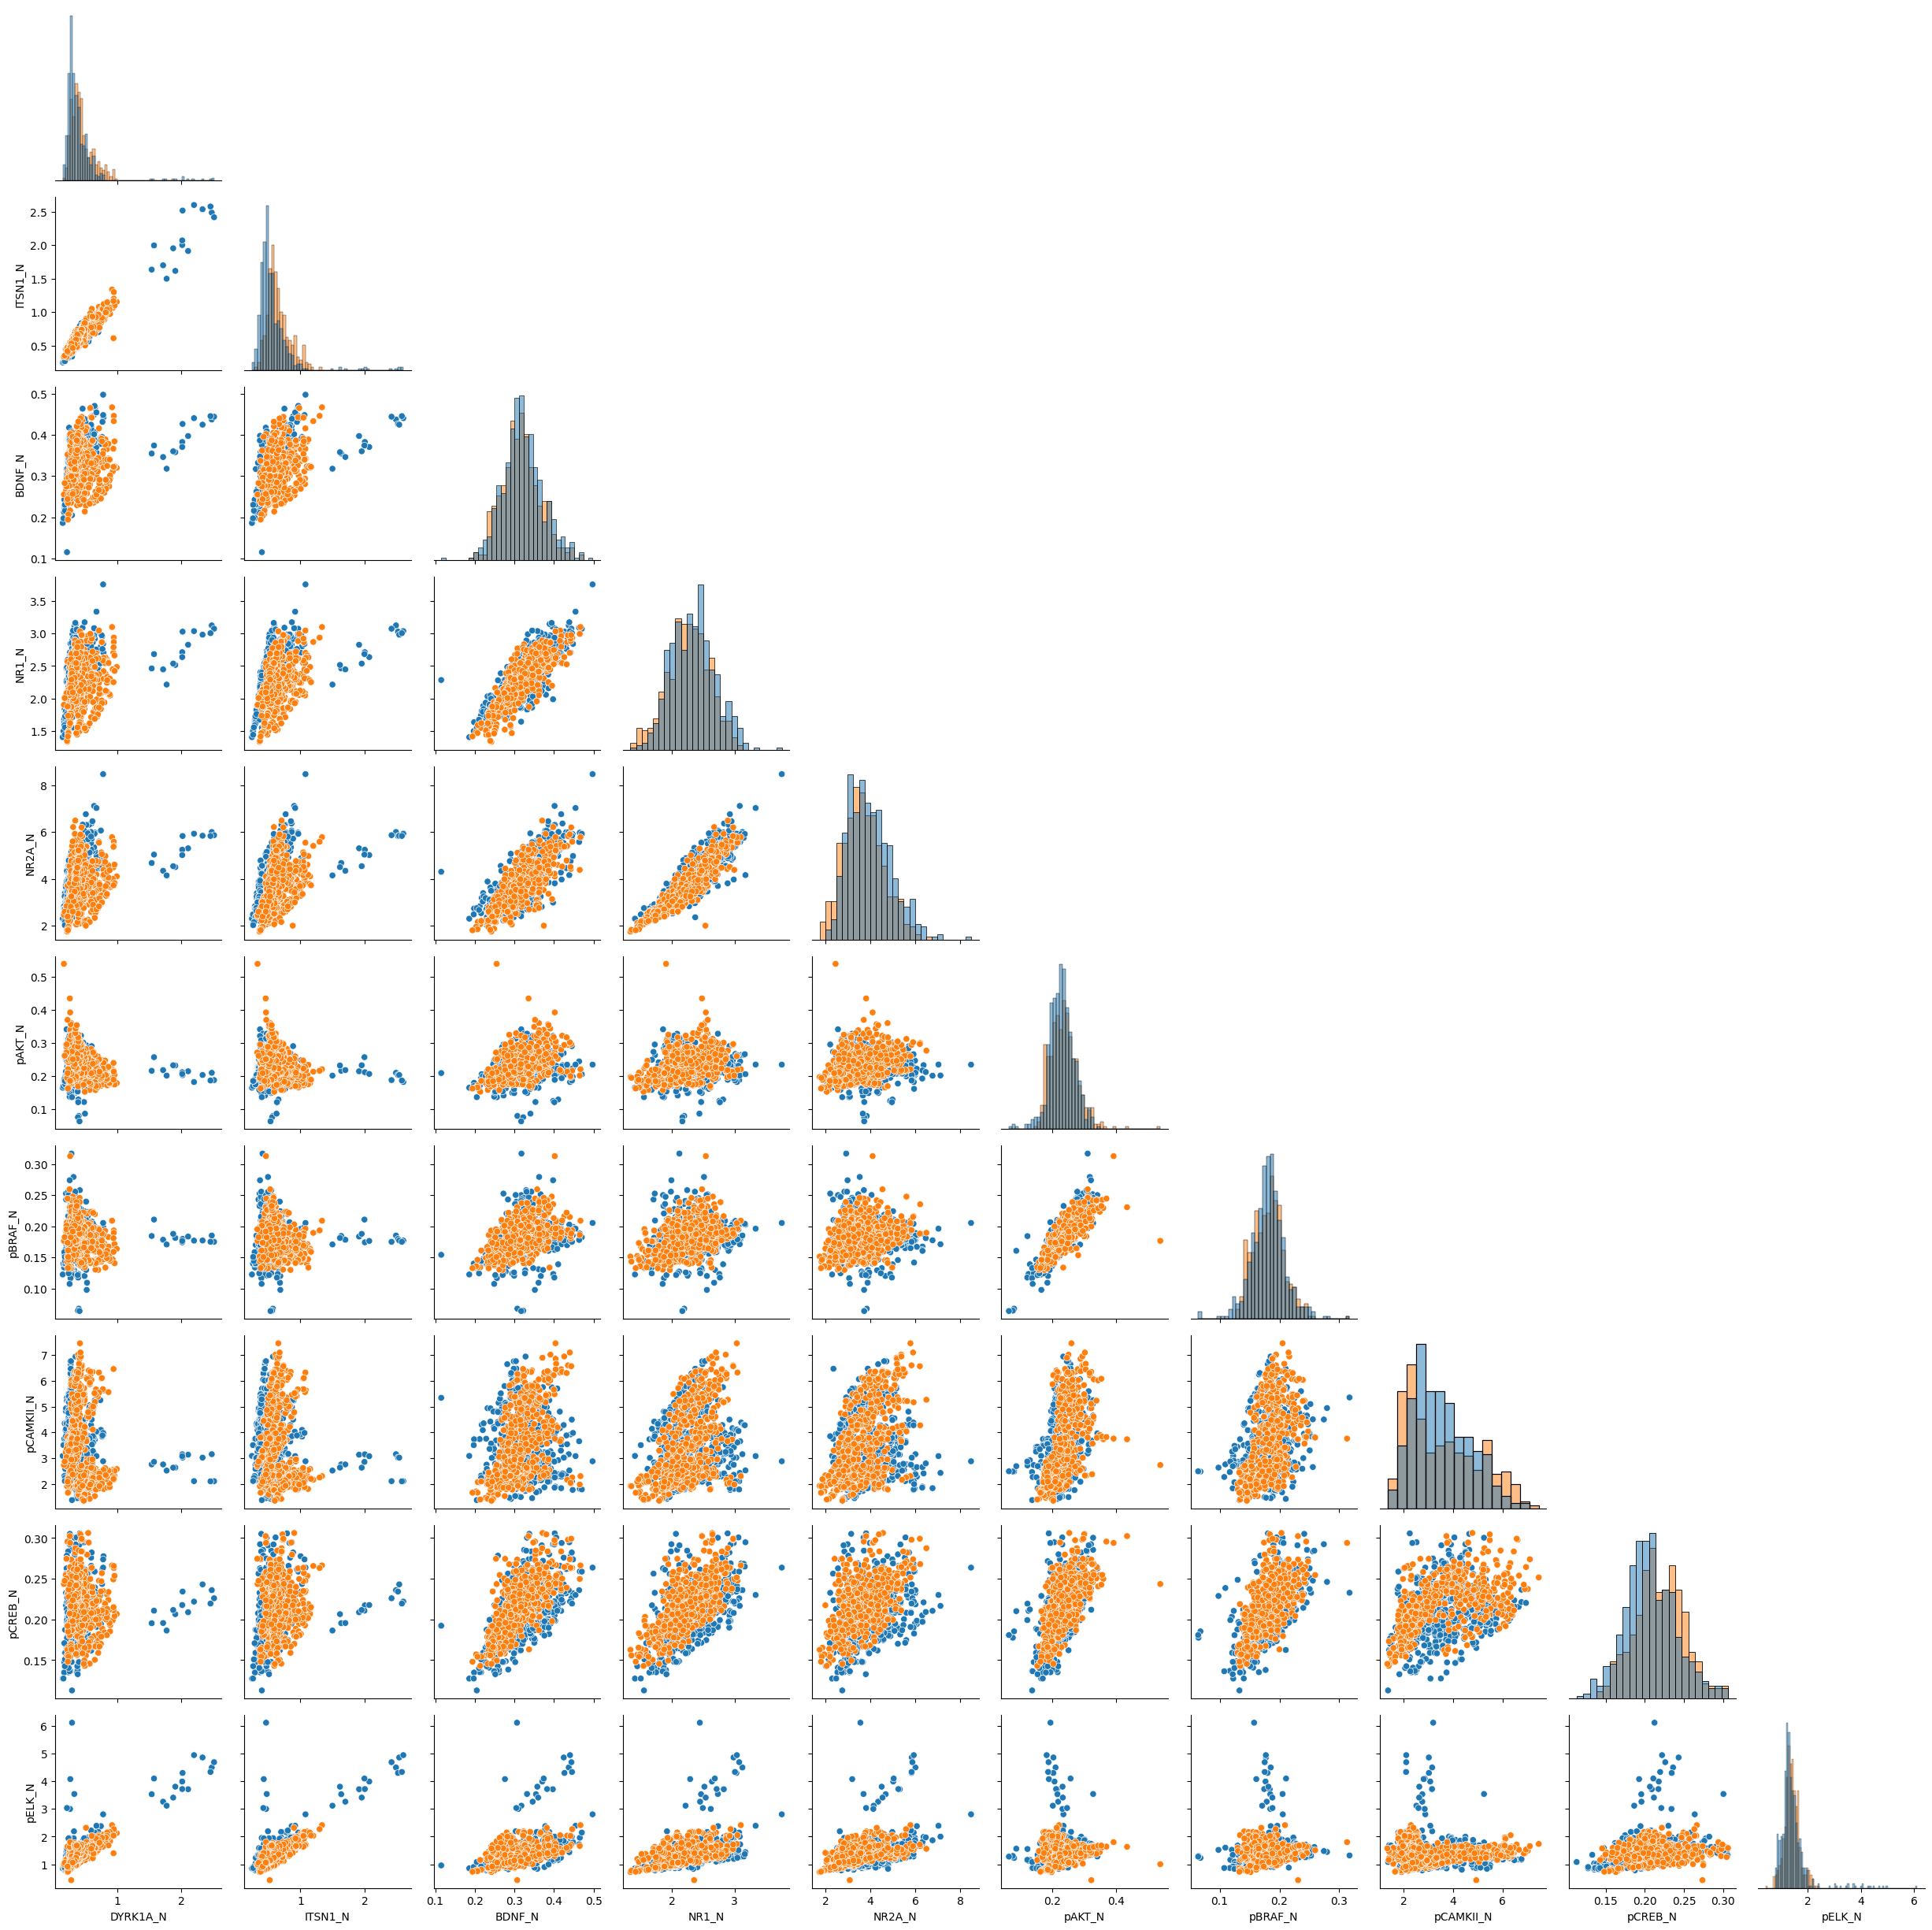

In [70]:
g =sns.PairGrid(data,hue = 'Genotype',vars=data.columns[:10],diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

##### 1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы.

In [71]:
test, control = data.loc[data.Genotype == 'Ts65Dn','DYRK1A_N'].dropna(),data.loc[data.Genotype == 'Control','DYRK1A_N']
info = pd.concat([test.describe(),control.describe()],axis=1)
print(info)
print(test.isna().mean(),control.isna().mean())

         DYRK1A_N    DYRK1A_N
count  507.000000  570.000000
mean     0.449480    0.404756
std      0.172012    0.300553
min      0.163325    0.145327
25%      0.328837    0.270523
50%      0.408065    0.328347
75%      0.533098    0.440944
max      0.992220    2.516367
0.0 0.0


Nan исключаем из выборки

In [72]:
import scipy.stats as sps


sps.ttest_ind(test, control,equal_var=False)

Ttest_indResult(statistic=3.03720251117003, pvalue=0.002454893782200822)

**Вывод** Не можем опровергнуть гипотезу о приросте в экспрессивности гена  DYRK1A_N в тестовой выборке

Посчитайте реализацию доверительного интервала величины сдвига. 


In [73]:
# under assumption that variance is equal
gap = test.mean() -  control.mean()

variance = (test.var() + control.var()) / (test.count() + control.count()) 

Z = sps.norm.ppf(0.95)

print("Доверительный интервал:", (gap - Z * variance ** 0.5,gap + Z * variance ** 0.5))

Доверительный интервал: (0.02736727825436263, 0.062080529332183616)


##### 2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

In [74]:
test, control = data.loc[data.Genotype == 'Ts65Dn','BDNF_N'].dropna(), data.loc[data.Genotype == 'Control','BDNF_N'].dropna()

print('Two_sided:',sps.ttest_ind(test, control, equal_var=False))
print('Less:', sps.ttest_ind(test, control, equal_var=False,alternative='less'))
t_mean, c_mean = test.mean(), control.mean()
t_var, c_var = test.var() / test.size, control.var() / control.size
drift = t_mean - c_mean
drift_var = t_var + c_var 
Z = sps.norm().ppf(1-0.05/2)
print('Drift:', test.mean() - control.mean())
print('Two_sided CI:',(drift - Z*drift_var**0.5,drift + Z*drift_var**0.5))
Z = sps.norm().ppf(0.95)
print('Less CI:',(-np.infty, drift + Z*drift_var**0.5,))

Two_sided: Ttest_indResult(statistic=-1.445432236126993, pvalue=0.14862895442389568)
Less: Ttest_indResult(statistic=-1.445432236126993, pvalue=0.07431447721194784)
Drift: -0.004340429116723776
Two_sided CI: (-0.010225924495616228, 0.0015450662621686751)
Less CI: (-inf, 0.0005988343068585563)


**Вывод:** опровергаем гипотезу о различии средних и преимуществе контроля над тестом 

Как связаны доверительные интервалы с проверкой гипотез? Подтверждается ли это в данном примере?

**Ответ:**

Условие, при которых не можем опровергнуть альтернативу:
Двусторонняя альтернатива - левая граница больше 0 или правая граница меньше 0

Левосторонняя альтернатива - правая граница меньше 0

Подтверждается: p_value > 0.05 и условие на неопровержение альтернативы не выполняются.

#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [75]:
path = 'pid-5M.csv'
data = pd.read_csv(path,index_col=[0])


In [76]:
data

,p,theta,beta,nphe,ein,eout
id,,,,,,
211,0.780041,1.081480,0.989962,0,0.000000,0.000000
211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
211,0.476997,0.445561,0.951471,0,0.000000,0.000000
2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...
211,0.835889,0.495847,0.975812,0,0.000000,0.046967
211,2.027470,0.287966,1.222890,0,0.197894,0.186404
211,0.827497,0.689746,0.980957,0,0.000000,0.000000


Постройте гистограммы признаков для каждого вида частиц.

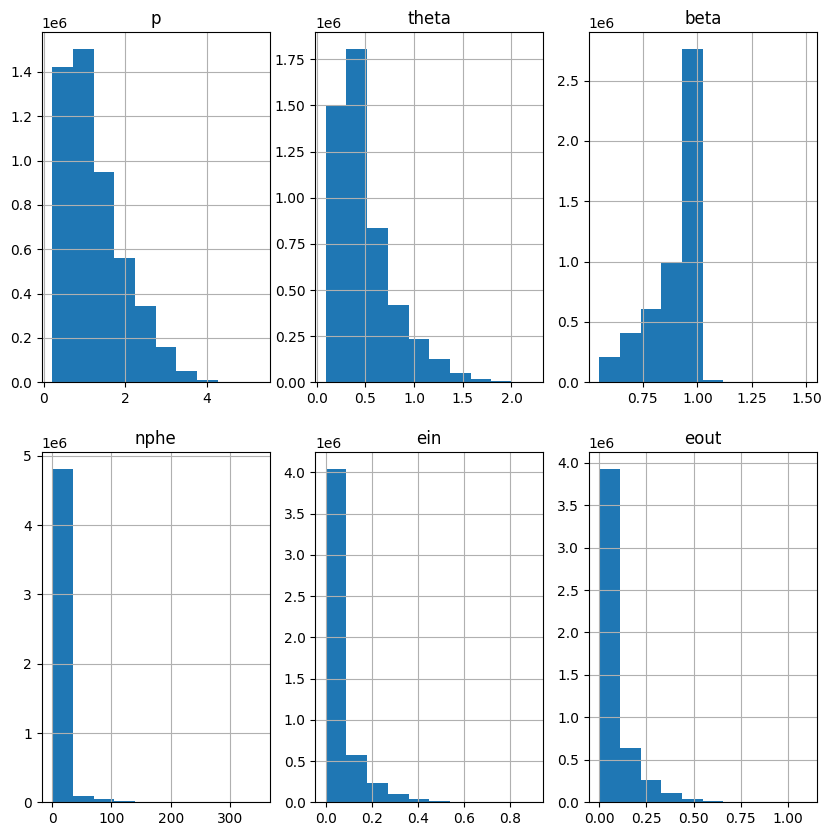

In [77]:
fig, ax =plt.subplots(2,3, figsize=(10,10))

for i, name in enumerate(data.columns):
    ax[i//3,i%3].hist(data[name])
    ax[i//3,i%3].grid(),ax[i//3,i%3].set(title=name)

Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [140]:
means = data.groupby(['id']).mean()
var = data.groupby(['id']).var()/ data.groupby(['id']).count()

In [147]:
means

,p,theta,beta,nphe,ein,eout
id,,,,,,
-11,0.591886,0.471277,1.001011,26.177948,0.068000,0.021495
211,1.035184,0.574035,0.968695,4.636706,0.042600,0.052250
321,1.744734,0.381561,0.921961,2.001605,0.060969,0.088638
2212,1.454526,0.379136,0.796434,2.059655,0.075566,0.094600


Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


In [146]:
for particle_id in means.index:
    mask = means.index == particle_id 
    control_mean = means.loc[mask]
    control_var = var.loc[mask]

    test_means = means.loc[~mask]
    test_vars = var.loc[~mask]
    print(f"Тесты для частицы {particle_id}")
    p_value =[]
    for (part_name,test_mean),(_,test_var) in zip(test_means.iterrows(),test_vars.iterrows()):
        Z = np.abs((test_mean-control_mean)/(test_var+control_var)**0.5)
        p_value.append((sps.norm.sf(Z) + sps.norm.cdf(-Z))[0])
    p_value = np.array(p_value)
    print(pd.DataFrame(p_value,index=test_means.index,columns=means.columns))

Тесты для частицы -11
        p  theta  beta  nphe            ein  eout
id                                               
211   0.0    0.0   0.0   0.0  1.482715e-269   0.0
321   0.0    0.0   0.0   0.0   3.416035e-21   0.0
2212  0.0    0.0   0.0   0.0   1.678104e-25   0.0
Тесты для частицы 211
         p  theta  beta  nphe            ein  eout
id                                                
-11    0.0    0.0   0.0   0.0  1.482715e-269   0.0
 321   0.0    0.0   0.0   0.0   0.000000e+00   0.0
 2212  0.0    0.0   0.0   0.0   0.000000e+00   0.0
Тесты для частицы 321
         p         theta  beta      nphe           ein           eout
id                                                                   
-11    0.0  0.000000e+00   0.0  0.000000  3.416035e-21   0.000000e+00
 211   0.0  0.000000e+00   0.0  0.000000  0.000000e+00   0.000000e+00
 2212  0.0  4.196481e-08   0.0  0.051543  0.000000e+00  8.851172e-143
Тесты для частицы 2212
        p         theta  beta      nphe           ein   

**Ответ:** 


Условие, при которых не можем опровергнуть альтернативу:
Двусторонняя альтернатива - левая граница больше 0 или правая граница меньше 0

Левосторонняя альтернатива - правая граница меньше 0

Подтверждается: p_value > 0.05 и условие на неопровержение альтернативы не выполняются.

Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:**
Неудобно различать по признаку nphe частицы 2212 и 321. В этом кейсе опровергаем гипотезу о различии частиц. По всем другим пересечениям удобно :)

Студенты профиля **химия** могут решать любую из задач.

## Задача 4
Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_n)$ — независимые выборки *одинакового* размера.

Выведите сходимость статистики:
- абсолютного t-test'а с помощью дельта-метода
- относительного t-test'а с помощью дельта-метода

Повторяю рассуждения из: https://stats.stackexchange.com/questions/333445/degrees-of-freedom-for-t-test-after-delta-method


$X^*$,$Y^*$ - истинные значения среднего

$$\sqrt{n}(\begin{pmatrix} \overline{X}\\ \overline{Y} \end{pmatrix} - \begin{pmatrix} X^*\\ Y^* \end{pmatrix} ) \xrightarrow{d} \mathrm{N}(\begin{pmatrix} 0\\ 0 \end{pmatrix},\begin{pmatrix} \sigma_X^2 & 0 \\ 0 & \sigma_Y^2\end{pmatrix})$$

Применяем дельта метод, где g:
1. $X^*-Y^*$ - для абсолютного теста
2. $X^*/Y^*$ - для относительного теста

$$\nabla g(\alpha,\beta)^T\begin{pmatrix} \sigma_\alpha^2 & 0 \\ 0 & \sigma_\beta^2\end{pmatrix}\nabla g(\alpha,\beta)$$

1. $$\begin{pmatrix} 1 & -1 \end{pmatrix} \begin{pmatrix} \sigma_X^2 & 0 \\ 0 & \sigma_Y^2\end{pmatrix} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \sigma^2_X + \sigma^2_Y $$

$$\sqrt{n} ( X^*-Y^* - X +Y ) \xrightarrow{d} \mathrm{N}(0, \sigma^2_X + \sigma^2_Y)$$



2. $$\begin{pmatrix} \frac{1}{Y} & \frac{-X}{Y^2} \end{pmatrix} \begin{pmatrix} \sigma_X^2 & 0 \\ 0 & \sigma_Y^2\end{pmatrix} \begin{pmatrix} \frac{1}{Y} \\ \frac{-X}{Y^2} \end{pmatrix} = \frac{\sigma^2_X}{Y^2} + \frac{X^2\sigma^2_Y}{Y^4}$$ 

$$\sqrt{n} ( \frac{X^*}{Y^*} - \frac{X}{Y}) \xrightarrow{d} \mathrm{N}(0, \frac{\sigma^2_X}{Y^2} + \frac{X^2\sigma^2_Y}{Y^4})$$